In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
X=df.drop('species',axis=1)
Y=df['species']

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=20)

In [11]:
x_train.shape,x_test.shape

((105, 4), (45, 4))

In [12]:
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier(max_depth=1)
dec.fit(x_train,y_train)
y_pred=dec.predict(x_test)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6

In [14]:
df = pd.DataFrame({"original":y_test,"predictions":y_pred})
df.head(20)

,original,predictions
47,setosa,setosa
73,versicolor,virginica
74,versicolor,virginica
129,virginica,virginica
67,versicolor,virginica
89,versicolor,virginica
143,virginica,virginica
21,setosa,setosa
108,virginica,virginica
12,setosa,setosa


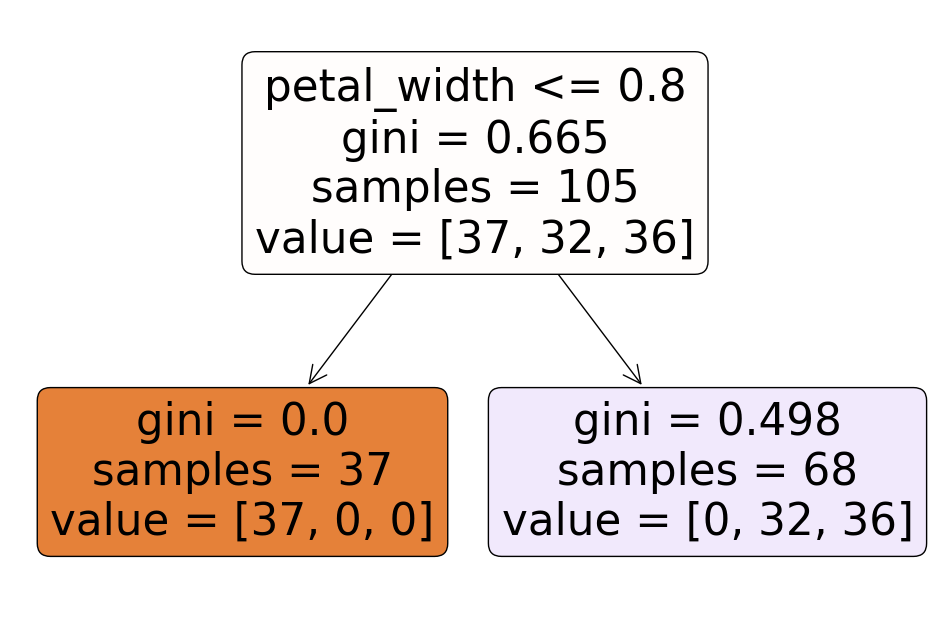

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(dec,filled=True,feature_names=x_train.columns, rounded=True)
plt.show()